In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

In [2]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    colors = sns.color_palette("hls", n_colors=K) 

    plt.figure(figsize=(10, 8))  
    
    for k in range(K):
        Xk = X[label == k, :]
        plt.scatter(Xk[:, 0], Xk[:, 1],lw=0, s=40, color=colors[k], label=f'Cluster {k}')
        
        # Circle around cluster
        circle = plt.Circle((np.mean(Xk[:, 0]), np.mean(Xk[:, 1])), max(np.std(Xk[:, 0]), np.std(Xk[:, 1])), color=colors[k], fill=False)
        plt.gca().add_artist(circle)

        # Number clusters
        xtext, ytext = np.median(X[label == k, :], axis=0)
        plt.text(xtext, ytext, str(k), fontsize=12, color='black', ha='center', va='center')
        
    plt.title(f'Number of Clusters: {K}')
    plt.axis('equal')
    # plt.legend()
    plt.show()
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break

        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [3]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
y = digits.target

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [4]:
K = 10
(centers, labels, it) = kmeans(X_pca , K)

print('Centers found by our algorithm:')
print(centers[-1])

Centers found by our algorithm:
[[ 22.72428557   0.35154729]
 [ -4.32454277   1.27233494]
 [-16.84507465  10.1200562 ]
 [-16.88370284  -4.77512729]
 [ 15.89705133  13.085717  ]
 [ -7.02759304 -14.30024966]
 [ 12.71534616 -16.99479515]
 [  1.17178704 -18.75612318]
 [  4.08319794  -7.54836913]
 [  1.18856464  21.4424583 ]]


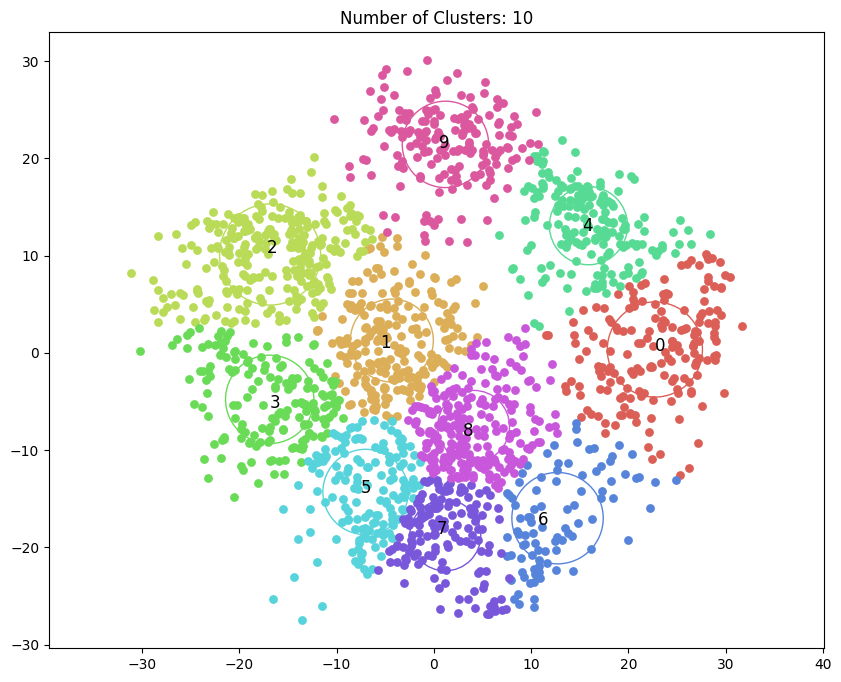

In [5]:
# Hiển thị kết quả phân cụm
kmeans_display(X_pca , labels[-1])